In [33]:
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

# MNIST dataset

* 70,000 small images of digits, that were collected by high school students and employees in US
* It is known as the hello world of engineering
* Whenever a new ML algorithm is built, people are excited to test it on MNIST dataset

In [ ]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
X,y = mnist["data"],mnist["target"]

In [6]:
y[0]

'5'

In [7]:
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classifier

* Classifing between 2 categories 
* The answer is either Yes or No
* Eg: Classifing Image as 5 or not 5
* Stochastic Gradiend Descent classifier

In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [11]:
y_pred = sgd_clf.predict(X_test)

In [13]:
y_pred[:]

array([False, False, False, ..., False,  True, False])

# Cross Validation

In [17]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

# Confusion Matrix

* A much better way to evaluate the performance of a classifier is to look at the confusion matrix
* The general idea is to count the number of times instances of class A are classified as class B.
* to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

* To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets

In [19]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

* 53892 - Correctly classified as non-5s
* 687 - Wrongly classified as 5s
* 1891 - Wrongly classified as non-5s
* 3530 - Correctly classified as 5s

A perfect classifier must have only True Positives and True Negatives

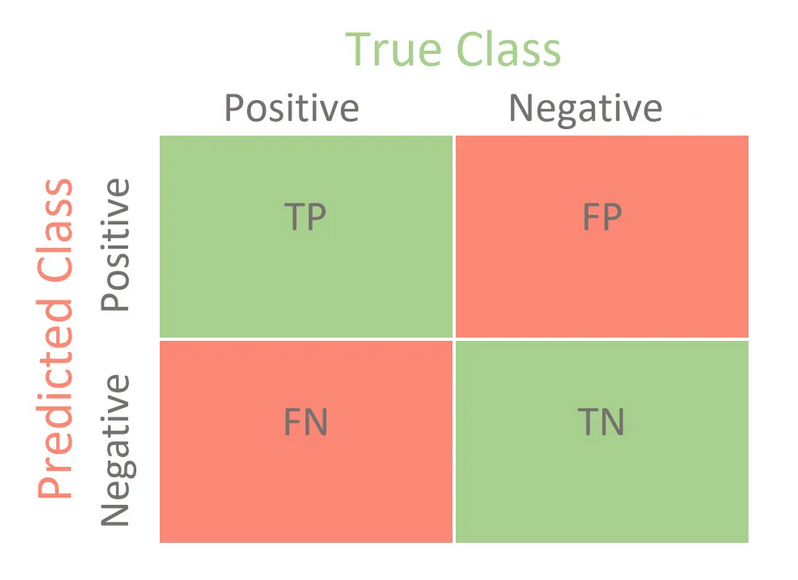

In [24]:
y_train_perfect_predictions = y_train_5 
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

Accuracy of the positive prediction is called precision
* Precision = TP/(TP+FP)
* TP - True Positive
* FP - False Positive

Precision is always compared by another matrix
* Recall = TP/(TP+FN)
* TP - True Positive
* FN - False Negative

In the case of example 5 or not 
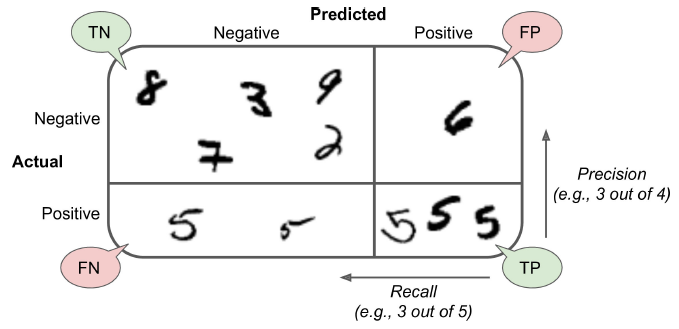

In [28]:
print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall:    ", recall_score(y_train_5, y_train_pred))

Precision:  0.8370879772350012
Recall:     0.6511713705958311


F1 score
* Combine precision and recall into a single metric called the F1 score
* F1 = 2/((1/precision)+(1/recall))

In [32]:
print("F1 score: ",f1_score(y_train_5, y_train_pred))

F1 score:  0.7325171197343846


Precision Recall Curve

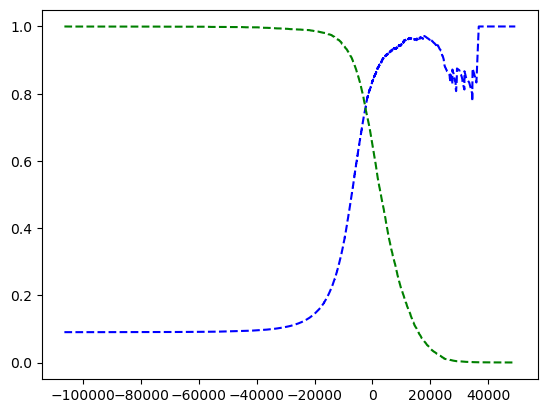

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    [...]
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Precision-Recall vs Threshold
* When Precision Increase, Recall Decreases
* the intersection of Precision and recal is called the Threshold 